# NLP: Lab 8 (Word2vec)

## Exercises

Task 0. Train your word2vec model on an multi-document (for example) NLTK corpus.
don’t forget to preprocess tokens first (lemmatization etc.)

Завдання 0: Навчіть вашу модель Word2Vec на багатодокументному корпусі (наприклад, з NLTK)
Не забудьте попередньо обробити токени (лематизація тощо)

In [3]:
!pip install gensim
!pip install pot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 1.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 1.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 1.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 901.9 kB/s eta 0:00:00 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3

[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.3/344.3 kB 1.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [17]:
import nltk
from nltk.corpus import brown, reuters
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from gensim.models import Word2Vec
import string

# Завантаження необхідних ресурсів
nltk.download('brown')
nltk.download('reuters')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Ініціалізація лематизатора
lemmatizer = WordNetLemmatizer()

# Функція для попередньої обробки тексту
def preprocess_text(text):
    # Токенізація та переведення в нижній регістр
    tokens = word_tokenize(text.lower())
    
    processed_tokens = []
    for token, tag in nltk.pos_tag(tokens):
        # Видалення пунктуації
        token = token.strip(string.punctuation)
        if not token:
            continue
        
        # Визначення частини мови для лематизації
        if tag.startswith('NN'):  # Іменник
            pos = 'n'
        elif tag.startswith('VB'):  # Дієслово
            pos = 'v'
        elif tag.startswith('JJ'):  # Прикметник
            pos = 'a'
        elif tag.startswith('RB'):  # Прислівник
            pos = 'r'
        else:
            pos = 'n'  # За замовчуванням - іменник
            
        # Лематизація
        lemma = lemmatizer.lemmatize(token, pos)
        processed_tokens.append(lemma)
    
    return processed_tokens

# Отримання даних з корпусів Brown та Reuters
corpus = []
print("Обробка корпусу Brown...")
for fileid in brown.fileids():
    raw_text = brown.raw(fileid)
    sentences = sent_tokenize(raw_text)
    for sent in sentences:
        corpus.append(preprocess_text(sent))

print("Обробка корпусу Reuters...")
for fileid in reuters.fileids():
    raw_text = reuters.raw(fileid)
    sentences = sent_tokenize(raw_text)
    for sent in sentences:
        corpus.append(preprocess_text(sent))

print(f"Загалом оброблено {len(corpus)} речень")

# Навчання моделі Word2Vec
print("\nПочаток навчання Word2Vec моделі...")
model = Word2Vec(
    sentences=corpus,
    vector_size=100,    # Розмір векторів
    window=5,          # Розмір контексту
    min_count=5,       # Мінімальна частота слова
    workers=4,         # Кількість ядер процесора
    epochs=10          # Кількість епох навчання
)

# Збереження моделі
model.save("word2vec_nltk.model")
print("Модель успішно навчена та збережена!")

# Приклади використання
print("\nПриклади роботи моделі:")
test_words = ["king", "woman", "computer", "bank"]
for word in test_words:
    if word in model.wv:
        print(f"\nНайбільш схожі слова на '{word}':")
        for similar_word, similarity in model.wv.most_similar(word, topn=5):
            print(f"{similar_word}: {similarity:.3f}")
    else:
        print(f"\nСлово '{word}' відсутнє у словнику моделі")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/boykosvitlana/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     /Users/boykosvitlana/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/boykosvitlana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/boykosvitlana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/boykosvitlana/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Обробка корпусу Brown...
Обробка корпусу Reuters...
Загалом оброблено 114442 речень

Початок навчання Word2Vec моделі...
Модель успішно навчена та збережена!

Приклади роботи моделі:

Найбільш схожі слова на 'king':
fahd: 0.713
caw: 0.704
burger: 0.703
esso: 0.698
teck: 0.646

Найбільш схожі слова на 'woman':
father: 0.790
amro: 0.743
founding: 0.708
girozentrale: 0.700
palmer: 0.694

Найбільш схожі слова на 'computer':
health: 0.823
care: 0.805
software: 0.787
specialty: 0.779
memory: 0.760

Найбільш схожі слова на 'bank':
banker: 0.672
bundesbank: 0.629
fund: 0.590
saving: 0.543
banking: 0.541


Task 1. Practice using similarity/distance.

Завдання 1: Попрактикуйтеся у використанні схожості/відстані між словами


In [11]:
from gensim.models import Word2Vec
from scipy.spatial.distance import cosine, euclidean

# Завантаження натренованої моделі
model = Word2Vec.load("word2vec_nltk.model")

# Функція для обчислення косинусної схожості (gensim має вбудовану, але можна і вручну)
def cosine_similarity(vec1, vec2):
    return 1 - cosine(vec1, vec2)

# Обране пару слів для порівняння
word_pairs = [
    ("king", "queen"),
    ("man", "woman"),
    ("computer", "keyboard"),
    ("bank", "money"),
    ("happy", "joyful")
]

print("Схожість між парами слів:")
for w1, w2 in word_pairs:
    if w1 in model.wv and w2 in model.wv:
        sim = model.wv.similarity(w1, w2)  # Вбудована косинусна схожість
        print(f"  '{w1}' і '{w2}': {sim:.4f}")
    else:
        print(f"  Одне зі слів '{w1}' або '{w2}' відсутнє в моделі")

# Знаходження найближчих слів (за косинусною схожістю)
target_words = ["king", "computer", "happy"]
for word in target_words:
    if word in model.wv:
        print(f"\nНайближчі слова до '{word}':")
        for similar_word, similarity in model.wv.most_similar(word, topn=5):
            print(f"  {similar_word}: {similarity:.4f}")
    else:
        print(f"\nСлово '{word}' відсутнє в моделі")

# Приклад порівняння косинусної та евклідової відстаней між двома словами
word1, word2 = "king", "queen"
if word1 in model.wv and word2 in model.wv:
    vec1 = model.wv[word1]
    vec2 = model.wv[word2]
    cos_sim = cosine_similarity(vec1, vec2)
    euc_dist = euclidean(vec1, vec2)
    print(f"\nКосинусна схожість між '{word1}' і '{word2}': {cos_sim:.4f}")
    print(f"Евклідова відстань між '{word1}' і '{word2}': {euc_dist:.4f}")


Схожість між парами слів:
  'king' і 'queen': 0.3986
  'man' і 'woman': 0.2268
  Одне зі слів 'computer' або 'keyboard' відсутнє в моделі
  'bank' і 'money': 0.4858
  Одне зі слів 'happy' або 'joyful' відсутнє в моделі

Найближчі слова до 'king':
  statoil: 0.6735
  fahd: 0.6729
  trans: 0.6648
  et: 0.6569
  esso: 0.6555

Найближчі слова до 'computer':
  health: 0.8047
  software: 0.7968
  specialty: 0.7709
  equipment: 0.7668
  care: 0.7619

Найближчі слова до 'happy':
  pleased: 0.8174
  satisfy: 0.8010
  dissatisfy: 0.7597
  totally: 0.7594
  comfortable: 0.7481

Косинусна схожість між 'king' і 'queen': 0.3986
Евклідова відстань між 'king' і 'queen': 2.1869


Task 2. Visualize document distances on a plot.

Завдання 2: Візуалізуйте відстані між документами на графіку

/Users/boykosvitlana/dl_venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


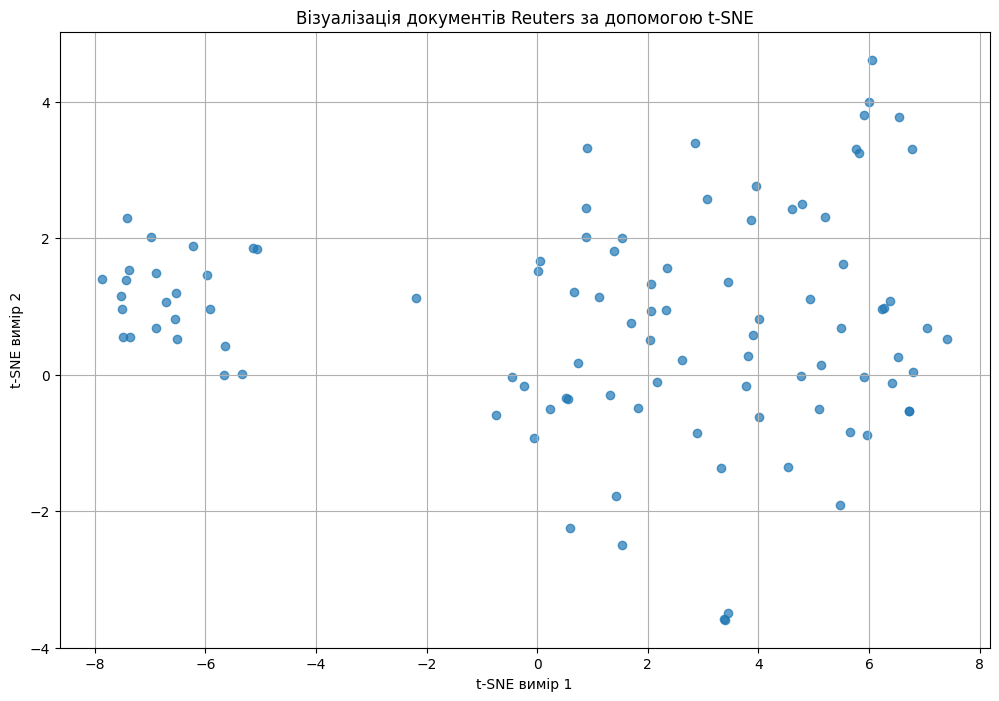

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.spatial.distance import cosine

# Функція для отримання вектора документа як середнього вектора його слів
def document_vector(model, doc_tokens):
    # Фільтруємо слова, яких немає в словнику моделі
    valid_words = [word for word in doc_tokens if word in model.wv]
    if not valid_words:
        # Якщо немає валідних слів, повертаємо вектор нулів
        return np.zeros(model.vector_size)
    # Обчислюємо середнє векторів
    return np.mean(model.wv[valid_words], axis=0)

# Візьмемо частину документів із Reuters (щоб не дуже багато було)
sample_fileids = reuters.fileids()[:100]

# Для кожного документа отримаємо токени (лематизовані)
documents_tokens = []
for fileid in sample_fileids:
    raw_text = reuters.raw(fileid)
    sentences = sent_tokenize(raw_text)
    doc_tokens = []
    for sent in sentences:
        doc_tokens.extend(preprocess_text(sent))
    documents_tokens.append(doc_tokens)

# Обчислюємо вектори документів
doc_vectors = np.array([document_vector(model, doc) for doc in documents_tokens])

# Застосуємо PCA для зменшення розмірності до 50, щоб краще працював t-SNE
pca = PCA(n_components=50)
doc_vectors_pca = pca.fit_transform(doc_vectors)

# Застосуємо t-SNE для візуалізації в 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
doc_vectors_tsne = tsne.fit_transform(doc_vectors_pca)

# Відобразимо документи на графіку
plt.figure(figsize=(12, 8))
plt.scatter(doc_vectors_tsne[:, 0], doc_vectors_tsne[:, 1], alpha=0.7)

plt.title('Візуалізація документів Reuters за допомогою t-SNE')
plt.xlabel('t-SNE вимір 1')
plt.ylabel('t-SNE вимір 2')
plt.grid(True)
plt.show()


Task 3. Compare your own trained word2vec with pretrained Glove vectors, using KeyedVectors.evaluate_word_pairs.

Завдання 3: Порівняйте вашу навчену модель Word2Vec з попередньо навченими векторами GloVe, використовуючи KeyedVectors.evaluate_word_pairs

In [15]:
import gensim
from gensim.models import Word2Vec, KeyedVectors
from gensim.test.utils import datapath, get_tmpfile
from gensim.scripts.glove2word2vec import glove2word2vec

# 1. Завантаження власної моделі
w2v_model = Word2Vec.load("word2vec_nltk.model")

# 2. Завантаження попередньо натренованих GloVe векторів
# Спочатку треба завантажити файл GloVe (можна скачати з офіційного сайту https://nlp.stanford.edu/projects/glove/)

glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'http://localhost:8888/lab/tree/Downloads/glove.6B/glove.6B.100d.txt'

# Конвертація формату GloVe в Word2Vec (потрібно зробити один раз)
glove2word2vec(glove_input_file, word2vec_output_file)

# Завантаження конвертованої моделі
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

# 3. Оцінка моделей за допомогою стандартного датасету wordsim353
# Метод повертає кортеж (кореляція, втрата, кількість пар слів, відсутні слова)
print("Оцінка власної моделі Word2Vec:")
eval_w2v = w2v_model.wv.evaluate_word_pairs(datapath('wordsim353.tsv'))

print("\nОцінка попередньо навчених GloVe векторів:")
eval_glove = glove_model.evaluate_word_pairs(datapath('wordsim353.tsv'))

# 4. Виведення основних результатів
print(f"\nРезультати оцінки на wordsim353:\n"
      f"Word2Vec - Кореляція: {eval_w2v[0]:.4f}, Кількість оцінених пар: {eval_w2v[2]}\n"
      f"GloVe    - Кореляція: {eval_glove[0]:.4f}, Кількість оцінених пар: {eval_glove[2]}")


/var/folders/d_/m95y8vmd14s17wr96v8ppn_c0000gn/T/ipykernel_62761/3410871212.py:16: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


FileNotFoundError: [Errno 2] No such file or directory: 'glove.6B.100d.txt'

In [ ]:
import os
import urllib.request
import zipfile
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import Word2Vec, KeyedVectors
from gensim.test.utils import datapath

# Крок 1. Завантажити GloVe (якщо ще немає)
glove_filename = 'glove.6B.100d.txt'
glove_zip = 'glove.6B.zip'

if not os.path.exists(glove_filename):
    print("Завантаження GloVe архіву...")
    url = 'http://nlp.stanford.edu/data/glove.6B.zip'
    urllib.request.urlretrieve(url, glove_zip)
    print("Розпаковка архіву...")
    with zipfile.ZipFile(glove_zip, 'r') as zip_ref:
        zip_ref.extract(glove_filename)
    print("GloVe готовий до використання!")
else:
    print("GloVe файл вже існує.")

# Крок 2. Конвертувати GloVe у формат Word2Vec (якщо ще не зроблено)
word2vec_glove_file = 'glove.6B.100d.word2vec.txt'

if not os.path.exists(word2vec_glove_file):
    print("Конвертація GloVe у формат Word2Vec...")
    glove2word2vec(glove_filename, word2vec_glove_file)
    print("Конвертація завершена!")
else:
    print("Конвертований файл вже існує.")

# Крок 3. Завантажити вашу модель Word2Vec
print("Завантаження вашої моделі Word2Vec...")
w2v_model = Word2Vec.load("word2vec_nltk.model")

# Крок 4. Завантажити конвертовані GloVe вектори
print("Завантаження конвертованих GloVe векторів...")
glove_model = KeyedVectors.load_word2vec_format(word2vec_glove_file, binary=False)

# Крок 5. Оцінити обидві моделі на датасеті wordsim353
print("Оцінка вашої моделі Word2Vec на wordsim353:")
eval_w2v = w2v_model.wv.evaluate_word_pairs(datapath('wordsim353.tsv'))

print("Оцінка GloVe моделей на wordsim353:")
eval_glove = glove_model.evaluate_word_pairs(datapath('wordsim353.tsv'))

print(f"\nРезультати оцінки:\n"
      f"Word2Vec - Кореляція: {eval_w2v[0]:.4f}, Кількість пар: {eval_w2v[2]}\n"
      f"GloVe    - Кореляція: {eval_glove[0]:.4f}, Кількість пар: {eval_glove[2]}")


Завантаження GloVe архіву...
